## Part 2: Digit Autoencoder

### Load dependencies

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from nn.nn import NeuralNetwork
from nn import io
from nn import preprocess

In [2]:
digits_data = datasets.load_digits()
X = digits_data.data

In [3]:
training_data = datasets.load_digits()
X = training_data.data

In [4]:
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[: -len(X) // 5]]
X_val = X[indices[-len(X) // 5 :]]

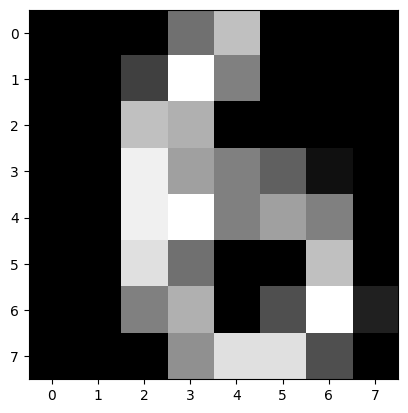

In [5]:
plt.imshow(X_train[0].reshape(8, 8), cmap="gray")
plt.show()

In [6]:
nn = NeuralNetwork(
    nn_arch=[{"input_dim": 64, "output_dim": 16, "activation": "relu"}, {"input_dim": 16, "output_dim": 64, "activation": "relu"}],
    lr=0.0001,
    seed=42,
    batch_size=20,
    epochs=10,
    loss_function="mean_squared_error",
)

In [7]:
per_epoch_loss_train, per_epoch_loss_val = nn.fit(X_train, X_train, X_val, X_val)

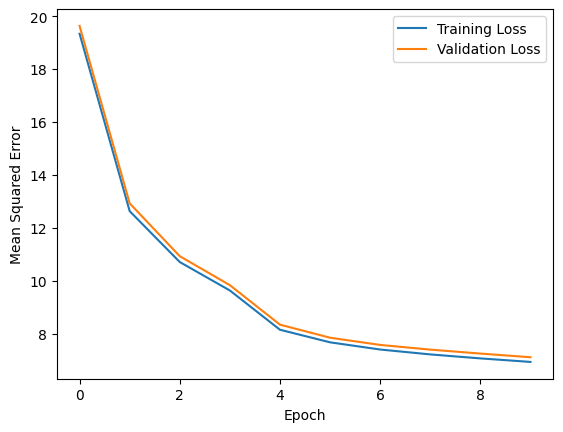

In [8]:
plt.plot(per_epoch_loss_train, label="Training Loss")
plt.plot(per_epoch_loss_val, label="Validation Loss")
plt.legend()
plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")
plt.show()


Text(0.5, 1.0, 'Top: Input\n\n Bottom: Output')

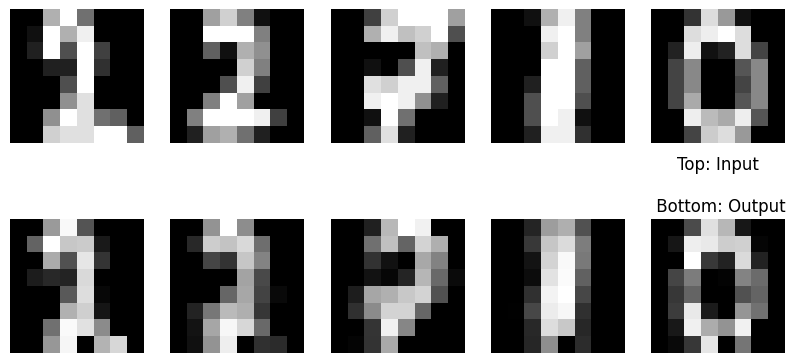

In [9]:
n_plot = 5
fig, axes = plt.subplots(2, n_plot, figsize=(10, 5))
output = nn.predict(X_val) 

for i in range(5): 
    axes[0, i].imshow(X_val[i].reshape(8,8), cmap='gray')
    axes[0, i].axis("off")
    axes[1, i].imshow(output[i].reshape(8,8), cmap='gray') 
    axes[1, i].axis("off")

plt.title("Top: Input\n\n Bottom: Output")


### Hyperparameters

I played around with the hyperparameters until I found the values that quickly minimizes the loss and converges to a good solution.